In [1]:
import tensorflow as tf
import PIL 
from PIL import Image
import scipy.io as sio
import glob 
import argparse

import numpy as np
from numpy import matlib
import math
import timeit

from main import *

%load_ext autoreload
%autoreload 2

In [2]:
DATA = 0
X_train, Y_train = load_data(DATA)

In [9]:
tf.reset_default_graph()
if DATA == 0:
    X = tf.placeholder(tf.float32, [None, 480, 640, 3])
    Y = tf.placeholder(tf.float32, [None, 480, 640, 1])
elif DATA == 1:
    X = tf.placeholder(tf.float32, [None, 240, 420, 3])
    Y = tf.placeholder(tf.float32, [None, 240, 420, 1])
LR = tf.placeholder(tf.float32)
is_training = tf.placeholder(tf.bool)

output = DACNet(X,DATA)
loss = tf.nn.l2_loss(output-Y)
mean_loss = tf.reduce_mean(loss)

In [10]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
# sess.run(tf.global_variables_initializer())
saver.restore(sess, './Models/data_0_epochs_2_batchsize_3_rate_0.01_decay_1.0')

INFO:tensorflow:Restoring parameters from ./Models/data_0_epochs_2_batchsize_3_rate_0.01_decay_1.0


InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [3,3,64,64] rhs shape= [3,3,3,64]
	 [[Node: save/Assign_3 = Assign[T=DT_FLOAT, _class=["loc:@conv2d_1/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](conv2d_1/kernel, save/RestoreV2_3)]]

Caused by op 'save/Assign_3', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-f3f3f4879171>", line 2, in <module>
    saver = tf.train.Saver()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 1139, in __init__
    self.build()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 1170, in build
    restore_sequentially=self._restore_sequentially)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 691, in build
    restore_sequentially, reshape)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 419, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 155, in restore
    self.op.get_shape().is_fully_defined())
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/state_ops.py", line 271, in assign
    validate_shape=validate_shape)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_state_ops.py", line 45, in assign
    use_locking=use_locking, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [3,3,64,64] rhs shape= [3,3,3,64]
	 [[Node: save/Assign_3 = Assign[T=DT_FLOAT, _class=["loc:@conv2d_1/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](conv2d_1/kernel, save/RestoreV2_3)]]


In [39]:
for var in tf.global_variables():
    print(var)
    print(var.eval())
#     import pdb; pdb.set_trace()

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>
[[[[ 0.03721106 -0.0395708   0.05921715 ...,  0.0772524  -0.04700859
    -0.0836769 ]
   [ 0.09627791  0.01521467  0.04995115 ..., -0.09106491 -0.02733729
     0.0563985 ]
   [ 0.06708041  0.00741357 -0.04203336 ..., -0.00949254  0.05898958
     0.03541309]]

  [[-0.02688547  0.02825525  0.02210091 ...,  0.0847249  -0.02522058
     0.07881191]
   [-0.01656248 -0.07461317 -0.01324681 ..., -0.03032541  0.01007961
    -0.07789741]
   [ 0.03193004 -0.05374136  0.08043976 ..., -0.06793184  0.04777014
     0.04521629]]

  [[ 0.00756699  0.05663411  0.03003287 ..., -0.02313802 -0.03328914
    -0.06200306]
   [ 0.06300625  0.03247216  0.04496494 ...,  0.07719794  0.08346786
    -0.0580124 ]
   [-0.01197132  0.06624295 -0.0771563  ...,  0.06300654 -0.00219871
    -0.06156888]]]


 [[[ 0.01570877  0.07952777  0.05828583 ...,  0.04287562  0.08644094
    -0.04860482]
   [ 0.03151059 -0.04493069  0.01082291 ...,  0.00804085 -0.07

[[[[ -1.59879811e-02  -1.56703368e-02  -2.15381347e-02 ...,
      5.59404306e-03  -4.48967889e-03   2.01276131e-02]
   [ -2.18547136e-02  -2.25702263e-02  -1.10170497e-02 ...,
     -1.60170924e-02  -1.07688364e-02   1.28918812e-02]
   [ -1.64631940e-02  -1.02242315e-02  -1.11982366e-02 ...,
      2.89715827e-05   2.79003754e-03  -6.10267557e-03]
   ..., 
   [ -2.36484408e-02  -1.46375513e-02   2.00111158e-02 ...,
      7.25601986e-03   2.02856883e-02   1.57878771e-02]
   [  9.13643837e-03  -1.63037591e-02   1.69492103e-02 ...,
      1.10177323e-03   1.57794394e-02  -2.18589082e-02]
   [ -7.40640052e-03  -1.69337709e-02  -1.78286470e-02 ...,
      1.61169060e-02  -2.16801409e-02  -1.44844353e-02]]

  [[ -2.01192461e-02  -2.09008623e-02  -8.35879706e-03 ...,
     -1.21080875e-03  -7.58673996e-05   1.86795741e-02]
   [ -1.40938992e-02  -1.53020397e-03   2.85304151e-03 ...,
     -2.35093441e-02   1.26487873e-02   2.41028704e-03]
   [ -4.20181081e-03  -2.16180366e-02   1.29357167e-02 ...,
 

4859.17


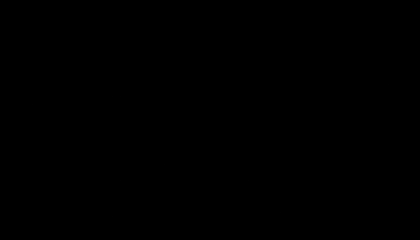

In [35]:
i = 7
IMG, img_loss = sess.run([output, mean_loss], {X: X_train[i:i+1,:,:,:],
                                          Y: Y_train[i:i+1,:,:,:],
                         is_training: False})
print(img_loss)
Image.fromarray(np.uint8(np.squeeze(IMG)*255.0))

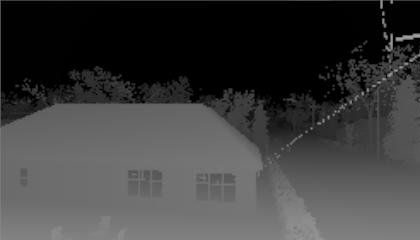

In [17]:
Image.fromarray(np.uint8(np.squeeze(Y_train[i,:,:,:]*255.0)))

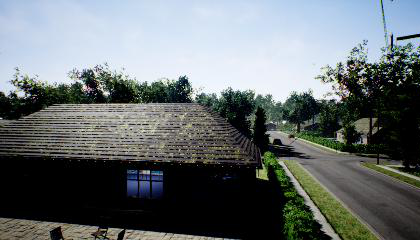

In [18]:
Image.fromarray(np.uint8(np.squeeze(X_train[i,:,:,:]*255.0)))